In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from seaborn import swarmplot
from pathlib import Path
import datetime
from ydata_profiling import ProfileReport
color_pal = sns.color_palette()
plt.style.use('fivethirtyeight')

#ARIMA
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
from statsmodels.tools.eval_measures import rmse

from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

import pmdarima as pm
#from fbprophet import Prophet

import xgboost as xgb


from pandas import to_datetime
from pmdarima.model_selection import train_test_split
from numpy import *

from sklearn import datasets, linear_model
from sklearn.datasets import load_wine
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.feature_selection import RFE
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from scipy.stats import pearsonr

%matplotlib inline

import random
from numpy import * 
from sklearn.metrics import roc_curve, auc

import itertools
import warnings
import time


warnings.filterwarnings('ignore', category=UserWarning, module='openpyxl')

In [66]:
def load_demand_full_data():
    return pd.read_csv(Path("C:/Users/User/Documents/UNSW_Data Science 7446/ZZSC9020 Data Science Capstone Project/Data/model_data.csv"))

In [67]:
# def timer(f):
#     start = time.time()
#     res = f()
#     end = time.time()
#     print("fitting: {}".format(end -start))
#     return res

In [68]:
# def build_model_for_data(data, target):
#     X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=1, test_size=0.4)
#     pipeline = make_pipeline(LinearRegression())
#     model = timer(lambda:pipeline.fit(X_train, y_train))
#     return(X_test, y_test, model)

In [69]:
demand_full = load_demand_full_data()

In [70]:
demand_full.head()

,Unnamed: 0,Year,Month,temp_mean,temp_min,temp_max,demand_mean,total_consumption,demand_max,demand_mean_max,pv_capacity,population,gsp
0,0,2010,1,20.868008,1.6,41.1,8941.450389,6554083.135,13765.04,10613.530000,28278.392,7110454,44504.25
1,1,2010,2,20.218907,3.2,35.4,8855.467677,5831325.465,13377.27,10380.667857,32153.986,7119405,44504.25
2,2,2010,3,19.828286,6.3,34.7,8698.725127,6319623.805,11991.47,10132.978710,38195.588,7128356,44504.25
3,3,2010,4,17.593856,6.5,29.9,8452.863411,5984627.295,11436.13,9804.072333,45142.723,7133668,44504.25
4,4,2010,5,15.323485,3.1,28.4,8897.770510,6459781.390,12386.49,10558.023548,54370.332,7138980,44504.25


In [71]:
demand = demand_full.drop(['Unnamed: 0', 'Year', 'Month', 'temp_min', 'temp_max', 'demand_max'], axis=1)

In [72]:
demand.head()

,temp_mean,demand_mean,total_consumption,demand_mean_max,pv_capacity,population,gsp
0,20.868008,8941.450389,6554083.135,10613.530000,28278.392,7110454,44504.25
1,20.218907,8855.467677,5831325.465,10380.667857,32153.986,7119405,44504.25
2,19.828286,8698.725127,6319623.805,10132.978710,38195.588,7128356,44504.25
3,17.593856,8452.863411,5984627.295,9804.072333,45142.723,7133668,44504.25
4,15.323485,8897.770510,6459781.390,10558.023548,54370.332,7138980,44504.25


In [73]:
Meandemand = demand.drop(['total_consumption','demand_mean_max', 'gsp'], axis=1)

In [74]:
Meandemand.head()

,temp_mean,demand_mean,pv_capacity,population
0,20.868008,8941.450389,28278.392,7110454
1,20.218907,8855.467677,32153.986,7119405
2,19.828286,8698.725127,38195.588,7128356
3,17.593856,8452.863411,45142.723,7133668
4,15.323485,8897.770510,54370.332,7138980


In [75]:
MeanMaxdemand = demand.drop(['total_consumption','demand_mean', 'gsp'], axis=1)

In [76]:
MeanMaxdemand.head()

,temp_mean,demand_mean_max,pv_capacity,population
0,20.868008,10613.530000,28278.392,7110454
1,20.218907,10380.667857,32153.986,7119405
2,19.828286,10132.978710,38195.588,7128356
3,17.593856,9804.072333,45142.723,7133668
4,15.323485,10558.023548,54370.332,7138980


In [77]:
demand.columns

Index(['temp_mean', 'demand_mean', 'total_consumption', 'demand_mean_max',
       'pv_capacity', 'population', 'gsp'],
      dtype='object')

                   temp_mean  demand_mean  total_consumption  demand_mean_max  \
temp_mean           1.000000    -0.372918          -0.453163        -0.430865   
demand_mean        -0.372918     1.000000           0.587890         0.950456   
total_consumption  -0.453163     0.587890           1.000000         0.540935   
demand_mean_max    -0.430865     0.950456           0.540935         1.000000   
pv_capacity         0.316728    -0.627870          -0.745976        -0.445191   
population          0.212053    -0.632958          -0.468298        -0.429565   
gsp                 0.192176    -0.607672          -0.491817        -0.404854   

                   pv_capacity  population       gsp  
temp_mean             0.316728    0.212053  0.192176  
demand_mean          -0.627870   -0.632958 -0.607672  
total_consumption    -0.745976   -0.468298 -0.491817  
demand_mean_max      -0.445191   -0.429565 -0.404854  
pv_capacity           1.000000    0.882998  0.894704  
population           

C:\Users\User\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


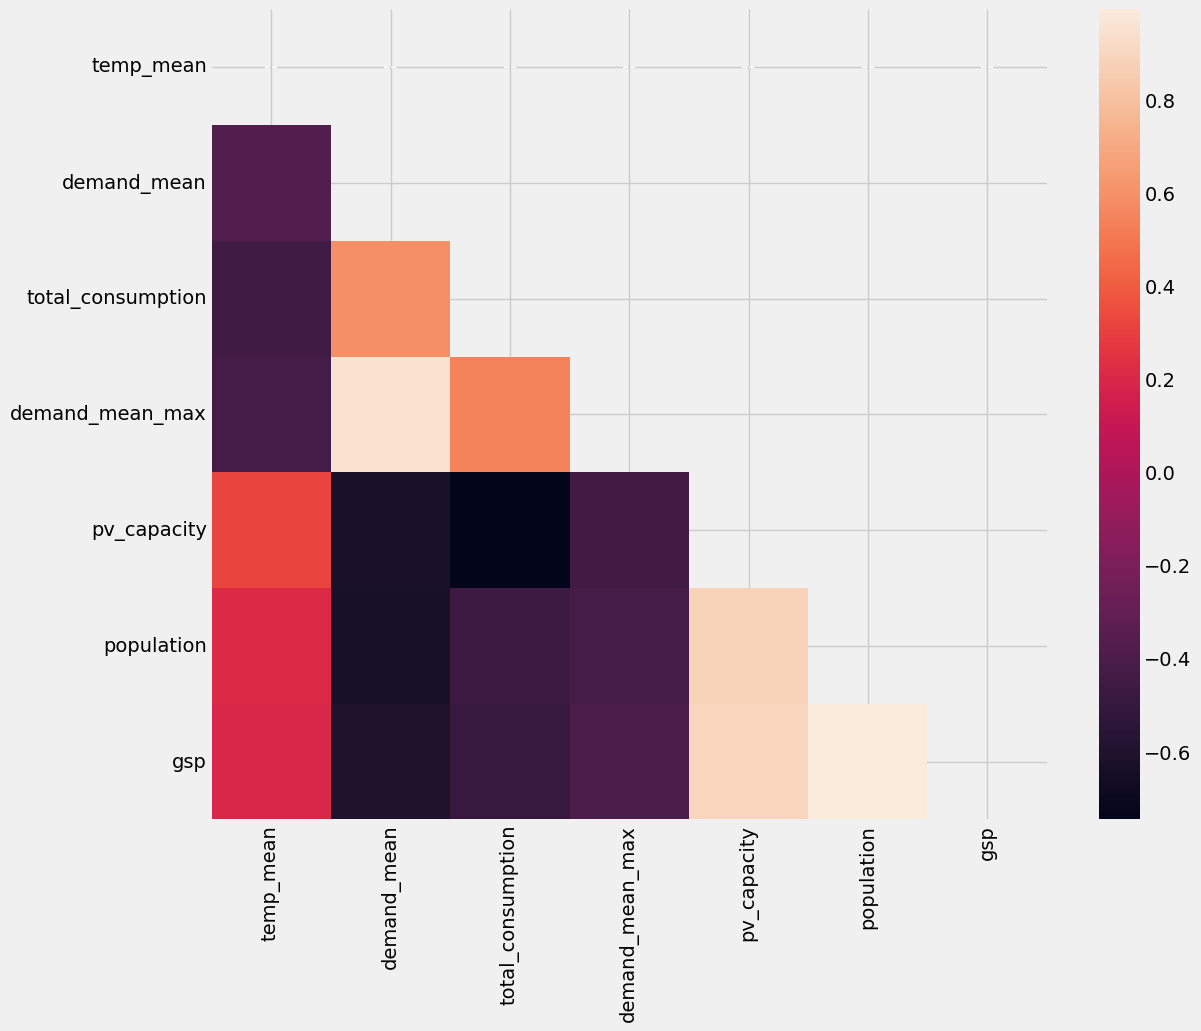

In [78]:

corr = demand.corr()
print(corr)
# Set up the matplotlib plot configuration
f, ax = plt.subplots(figsize=(12, 10))

# Generate a mask for upper triangle.
mask = np.triu(np.ones_like(corr, dtype=bool))

# Configure a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap
sns.heatmap(corr, annot=True, mask=mask)
plt.savefig('corr_heat_map.png')

In [79]:
corr_matrix = demand.corr()
corr_matrix["demand_mean"].sort_values(ascending=False)

demand_mean          1.000000
demand_mean_max      0.950456
total_consumption    0.587890
temp_mean           -0.372918
gsp                 -0.607672
pv_capacity         -0.627870
population          -0.632958
Name: demand_mean, dtype: float64

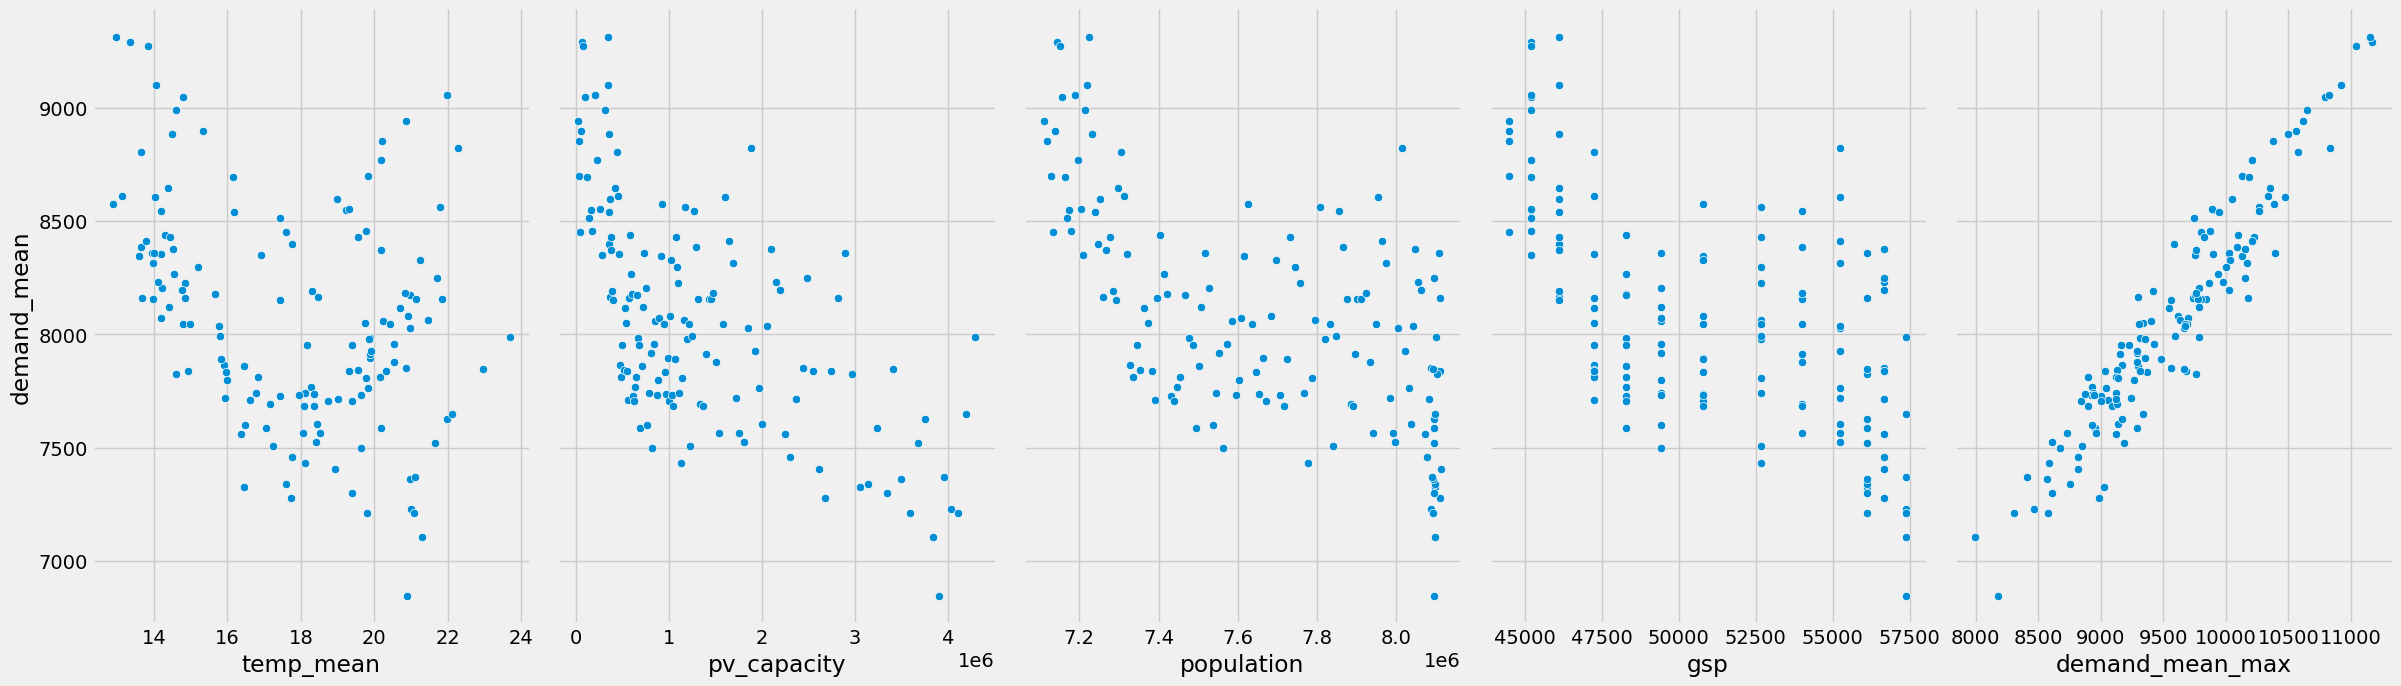

In [80]:
sns.pairplot(demand, x_vars=['temp_mean','pv_capacity','population','gsp', 'demand_mean_max'], y_vars='demand_mean', height=7, aspect=0.7);

###Linear Regression without data split

In [81]:
# x = demand[['temp_mean','pv_capacity','population','gsp']]
# y = demand.demand_mean

# linmod1 = LinearRegression()
# linmod1.fit(x,y)

# print(linmod1.intercept_)
# print(linmod1.coef_)
# list(zip(['temp_mean','pv_capacity','population','gsp'], linmod1.coef_))

##Calculating Model Accuracy

In [82]:
# linmod1_pred = linmod1.predict((x[['temp_mean','pv_capacity','population','gsp']]))

# print("RMSE:", np.sqrt(mean_squared_error(y, linmod1_pred)))
# print("R^2:", r2_score(y, linmod1_pred)*100)                               
                               

## Linear Regression with demand_mean without Normalisation (Variables - Temp_mean, PV Capacity, Population & GSP)

In [83]:
x = demand[['temp_mean','pv_capacity','population','gsp']]
y = demand.demand_mean

x_train, x_test, y_train,y_test = train_test_split(x,y, random_state = 1, test_size=0.4)

linmod2 = LinearRegression()
linmod2.fit(x_train,y_train)

print(linmod2.intercept_)
print(linmod2.coef_)
list(zip(['temp_mean','pv_capacity','population','gsp'], linmod2.coef_))

23280.31000404054
[-2.40136635e+01 -1.33543001e-04 -3.63206031e-03  2.58608013e-01]


[('temp_mean', -24.01366348110313),
 ('pv_capacity', -0.00013354300112430035),
 ('population', -0.0036320603110369006),
 ('gsp', 0.25860801328003474)]

## Calculating Model Accuracy

In [84]:
linmod2_pred = linmod2.predict((x[['temp_mean','pv_capacity','population','gsp']]))

print("RMSE:", np.sqrt(mean_squared_error(y, linmod2_pred)))
print("R^2:", r2_score(y, linmod2_pred)*100)       

RMSE: 341.53991703594585
R^2: 50.2183520366635


## Linear Regression with demand_mean without Normalisation (Variables - Temp_mean, PV Capacity, Population )

In [85]:
x = demand[['temp_mean','pv_capacity','population']]
y = demand.demand_mean

x_train, x_test, y_train,y_test = train_test_split(x,y, random_state = 1, test_size=0.4)

linmod2 = LinearRegression()
linmod2.fit(x_train,y_train)

print(linmod2.intercept_)
print(linmod2.coef_)
list(zip(['temp_mean','pv_capacity','population'], linmod2.coef_))

14007.455186076342
[-3.78013764e+01 -3.17394512e-05 -6.84890227e-04]


[('temp_mean', -37.80137644111146),
 ('pv_capacity', -3.173945122772616e-05),
 ('population', -0.0006848902265829513)]

In [86]:
linmod2_pred = linmod2.predict((x[['temp_mean','pv_capacity','population']]))

print("RMSE:", np.sqrt(mean_squared_error(y, linmod2_pred)))
print("R^2:", r2_score(y, linmod2_pred)*100)  

RMSE: 356.27742877450027
R^2: 45.8294866882883


## Linear Regression with demand_mean without Normalisation (Variables - Temp_mean, PV Capacity,  GSP)

In [87]:
x = demand[['temp_mean','pv_capacity','gsp']]
y = demand.demand_mean

x_train, x_test, y_train,y_test = train_test_split(x,y, random_state = 1, test_size=0.4)

linmod2 = LinearRegression()
linmod2.fit(x_train,y_train)

print(linmod2.intercept_)
print(linmod2.coef_)
list(zip(['temp_mean','pv_capacity','gsp'], linmod2.coef_))

10917.292388991304
[-3.59471019e+01 -7.14427210e-05 -4.19035054e-02]


[('temp_mean', -35.94710194947951),
 ('pv_capacity', -7.144272101803637e-05),
 ('gsp', -0.04190350537057264)]

In [88]:
linmod2_pred = linmod2.predict((x[['temp_mean','pv_capacity','gsp']]))

print("RMSE:", np.sqrt(mean_squared_error(y, linmod2_pred)))
print("R^2:", r2_score(y, linmod2_pred)*100)  

RMSE: 362.4951952268117
R^2: 43.92221630402804


 ## Linear Regression for demand_mean_max without  Normalisation  (Variables - Temp_mean, PV Capacity, Population & GSP)    

In [89]:
x = demand[['temp_mean','pv_capacity','population','gsp']]
y = demand.demand_mean_max

x_train, x_test, y_train,y_test = train_test_split(x,y, random_state = 1, test_size=0.4)

linmod2 = LinearRegression()
linmod2.fit(x_train,y_train)

print(linmod2.intercept_)
print(linmod2.coef_)
list(zip(['temp_mean','pv_capacity','population','gsp'], linmod2.coef_))

25930.737752614157
[-6.46005871e+01 -8.73805355e-05 -3.87412225e-03  2.84878148e-01]


[('temp_mean', -64.60058710115922),
 ('pv_capacity', -8.738053554857382e-05),
 ('population', -0.0038741222520478516),
 ('gsp', 0.2848781476906133)]

# Model Accuracy

In [90]:
linmod2_pred = linmod2.predict((x[['temp_mean','pv_capacity','population','gsp']]))

print("RMSE:", np.sqrt(mean_squared_error(y, linmod2_pred)))
print("R^2:", r2_score(y, linmod2_pred)*100)  

RMSE: 524.2419502075609
R^2: 32.57665180397517


## Data Normalisation using Min_Max Scaler

In [91]:

min_max = MinMaxScaler()

demand_min_max = min_max.fit_transform(Meandemand)
demandMeanMax_min_max = min_max.fit_transform(MeanMaxdemand)


In [92]:
print(min_max.fit(demand))

MinMaxScaler()


In [93]:
print(min_max.data_max_)

[2.36854167e+01 9.31332739e+03 6.92911558e+06 1.11660557e+04
 4.29145977e+06 8.11200100e+06 5.73910833e+04]


In [94]:
print(min_max.transform(demand))

[[7.39297559e-01 8.49323038e-01 9.41731264e-01 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [6.79234430e-01 8.14484600e-01 8.29436510e-01 ... 9.09084943e-04
  8.93717419e-03 0.00000000e+00]
 [6.43089275e-01 7.50975723e-01 9.05303352e-01 ... 2.32624304e-03
  1.78743484e-02 0.00000000e+00]
 ...
 [7.59350696e-01 1.47703089e-01 4.07794439e-03 ... 9.57987541e-01
  9.80771746e-01 1.00000000e+00]
 [8.54967829e-01 3.25848134e-01 8.99636279e-03 ... 9.76902815e-01
  9.85005197e-01 1.00000000e+00]
 [1.00000000e+00 4.62447670e-01 1.27677485e-02 ... 1.00000000e+00
  9.89238648e-01 1.00000000e+00]]


In [95]:
print(min_max.fit_transform(demand))

[[7.39297559e-01 8.49323038e-01 9.41731264e-01 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [6.79234430e-01 8.14484600e-01 8.29436510e-01 ... 9.09084943e-04
  8.93717419e-03 0.00000000e+00]
 [6.43089275e-01 7.50975723e-01 9.05303352e-01 ... 2.32624304e-03
  1.78743484e-02 0.00000000e+00]
 ...
 [7.59350696e-01 1.47703089e-01 4.07794439e-03 ... 9.57987541e-01
  9.80771746e-01 1.00000000e+00]
 [8.54967829e-01 3.25848134e-01 8.99636279e-03 ... 9.76902815e-01
  9.85005197e-01 1.00000000e+00]
 [1.00000000e+00 4.62447670e-01 1.27677485e-02 ... 1.00000000e+00
  9.89238648e-01 1.00000000e+00]]


In [96]:
scaled_df = pd.DataFrame(demand_min_max, columns=['temp_mean', 'demand_mean', 
       'pv_capacity', 'population'])

In [97]:
scaled_df_MaxDemand = pd.DataFrame(demandMeanMax_min_max, columns=['temp_mean', 'demand_mean_max', 
       'pv_capacity', 'population'])

In [98]:
scaled_df_MaxDemand.head()

,temp_mean,demand_mean_max,pv_capacity,population
0,0.739298,0.825820,0.000000,0.000000
1,0.679234,0.752412,0.000909,0.008937
2,0.643089,0.674330,0.002326,0.017874
3,0.436331,0.570644,0.003956,0.023178
4,0.226248,0.808322,0.006120,0.028482


In [99]:
scaled_df.head()

,temp_mean,demand_mean,pv_capacity,population
0,0.739298,0.849323,0.000000,0.000000
1,0.679234,0.814485,0.000909,0.008937
2,0.643089,0.750976,0.002326,0.017874
3,0.436331,0.651358,0.003956,0.023178
4,0.226248,0.831625,0.006120,0.028482


## Model Fitting after normalisation - Linear Regression Model for Mean Demand with features mean temperature, pv capacity, population

In [100]:
x_mm = scaled_df[['temp_mean','pv_capacity','population']]
y_mm = scaled_df.demand_mean

x_trainM, x_testM, y_trainM,y_testM = train_test_split(x_mm,y_mm, random_state = 1, test_size=0.4)

linmod_minMax = LinearRegression()
linmod_minMax.fit(x_trainM,y_trainM)

print(linmod_minMax.intercept_)
print(linmod_minMax.coef_)
list(zip(['temp_mean','pv_capacity', 'population'], linmod_minMax.coef_))

0.7311745101699492
[-0.16552358 -0.05482527 -0.27793282]


[('temp_mean', -0.1655235776803792),
 ('pv_capacity', -0.054825266989888946),
 ('population', -0.27793282054883944)]

#### Model Accuracy

In [101]:
linmod_minMax_pred = linmod_minMax.predict((x_mm[['temp_mean','pv_capacity','population']]))

print("RMSE:", np.sqrt(mean_squared_error(y_mm, linmod_minMax_pred)))
print("R^2:", r2_score(y_mm, linmod_minMax_pred)*100)  

RMSE: 0.14435633284014787
R^2: 45.82948668828829


## Model Fitting after normalisation - Linear Regression Model for Demand_Mean_Max with features population, mean temperature, pv capacity

In [102]:
x_ = scaled_df_MaxDemand[['temp_mean','pv_capacity','population']]
y_ = scaled_df_MaxDemand.demand_mean_max

x_trainMx, x_testMx, y_trainMx,y_testMx = train_test_split(x_,y_, random_state = 1, test_size=0.4)

linmod_minMax2 = LinearRegression()
linmod_minMax2.fit(x_trainMx,y_trainMx)

print(linmod_minMax2.intercept_)
print(linmod_minMax2.coef_)
list(zip(['temp_mean','pv_capacity', 'population'], linmod_minMax2.coef_))

0.703892081339165
[-0.27182705  0.03328197 -0.19814322]


[('temp_mean', -0.2718270541710003),
 ('pv_capacity', 0.0332819688970395),
 ('population', -0.19814321893618994)]

#### Model Accuracy

In [103]:
linmod_minMax_pred2 = linmod_minMax2.predict((x_[['temp_mean','pv_capacity', 'population']]))

print("RMSE:", np.sqrt(mean_squared_error(y_, linmod_minMax_pred2)))
print("R^2:", r2_score(y_, linmod_minMax_pred2)*100)  

RMSE: 0.16924774342493887
R^2: 29.28663068856796
